In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [2]:
# ON BRANCH Nov-2023-log10-DO-update-correct
train_csv = pd.read_csv('~/tmp/dynamic-learning-rivers/scripts/prep_06_output_final_train.csv')
train_ixy = pd.read_csv('~/tmp/dynamic-learning-rivers/scripts/prep_06_output_final_train.ixy')
# Merge on the exact row order since only .ixy has the Sample_ID
train = pd.merge(train_csv,train_ixy,left_index=True,right_index=True)
train.set_index('Sample_ID', inplace=True)

predict_avg = pd.read_csv('~/tmp/dynamic-learning-rivers/scripts/post_01_output_ml_predict_avg.csv')
predict_avg.set_index('Sample_ID', inplace=True)

predict_std = pd.read_csv('~/tmp/dynamic-learning-rivers/scripts/post_01_output_ml_predict_std.csv')
predict_std.set_index('Sample_ID', inplace=True)

# Merge on Sample_ID
predict = pd.merge(predict_avg,predict_std, left_index=True, right_index=True, suffixes=['_pre_avg','_pre_std'])
train_predict_merged = pd.merge(train,predict, left_index=True, right_index=True, suffixes=['_obs','_pre'])

In [3]:
#train.drop(['SSS005-1', 'SSS005-2', 'SSS005-3', 'S19S_0085-D', 'S19S_0085-M', 'S19S_0085-U'], inplace=True)

#train_predict_subset = predict.loc[train.index,:]
#train_predict_subset_std = predict_std.loc[train.index,:]

#train_predict_merged = pd.merge(train,train_predict_subset, left_index=True, right_index=True, suffix=['_obs','_pre'])

Pearson squared: 0.851948569194102
R2 score: 0.8416520316372258
Exp. var: 0.8420092881797496


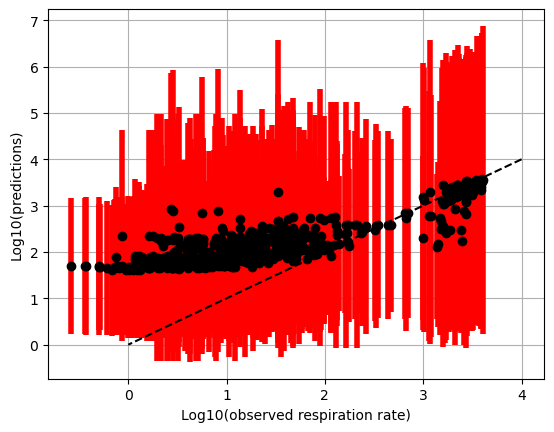

In [4]:
fig, ax = plt.subplots()

train

ax.errorbar(
    x=np.log10(np.abs(train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),
    y=np.log10(np.abs(train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'])),
    yerr=np.abs(np.log10(train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_std'])),
    elinewidth=4,
    fmt='ko',
    ecolor='r')

ax.plot([4.0,0.0],[4.0,0.0],'k--')

ax.grid()
ax.set_xlabel('Log10(observed respiration rate)')
ax.set_ylabel('Log10(predictions)')

my_r = np.corrcoef(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'])
print('Pearson squared: '+str(np.min(my_r*my_r)))

print('R2 score: '+str(
    r2_score(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'])
))

print('Exp. var: '+str(
    explained_variance_score(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'])
))

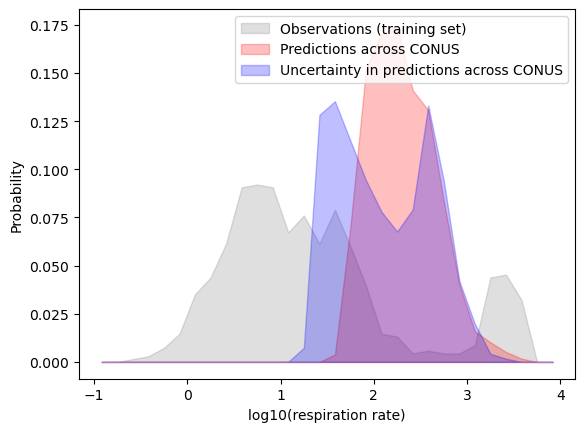

In [5]:
fig, ax = plt.subplots()

# Set binning
nbin=30
min_bin=-1
max_bin=4

#=========================================
# Histogram of the training set
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    train_predict_merged[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('gray'), alpha=0.25)
    
#=========================================
# Histogram of all predictions
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    predict[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('red'), alpha=0.25)

#=========================================
# Histogram of uncertainty in predictions
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    predict[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_std'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('blue'), alpha=0.25)

ax.set_xlabel('log10(respiration rate)')
ax.set_ylabel('Probability')
ax.legend(['Observations (training set)','Predictions across CONUS','Uncertainty in predictions across CONUS'])

Pearson squared on train (left panel): 0.48994010175055924
Pearson squared on train (right panel): 0.3867413868215744


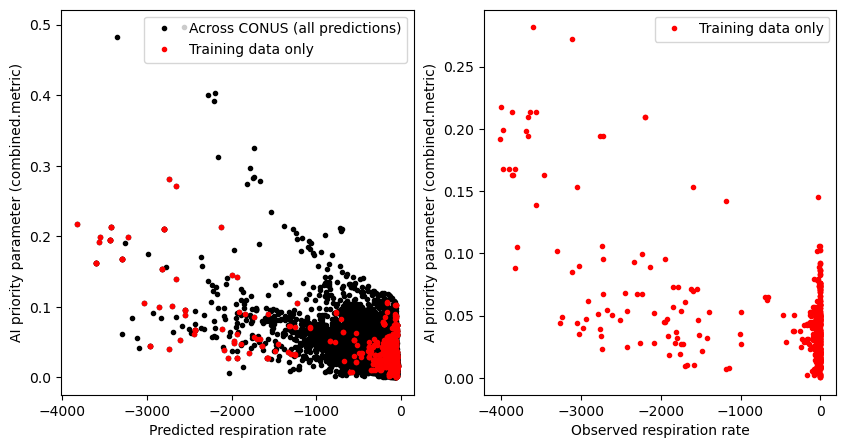

In [13]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,5))

ax.plot(
    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    predict['combined.metric_pre_avg'],
    'k.')

ax.plot(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    train_predict_merged['combined.metric_pre_avg'],
    'r.')

ax.set_xlabel('Predicted respiration rate')
ax.set_ylabel('AI priority parameter (combined.metric)')
ax.legend(["Across CONUS (all predictions)","Training data only"])

# No observations are available for predictions!
#ax2.plot(
#    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
#    predict['combined.metric_pre_avg'],
#    'k.')

ax2.plot(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['combined.metric_pre_avg'],
    'r.')

ax2.set_xlabel('Observed respiration rate')
ax2.set_ylabel('AI priority parameter (combined.metric)')
ax2.legend(["Training data only"])

my_r = np.corrcoef(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    train_predict_merged['combined.metric_pre_avg'])
print('Pearson squared on train (left panel): '+str(np.min(my_r*my_r)))

my_r = np.corrcoef(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['combined.metric_pre_avg'])
print('Pearson squared on train (right panel): '+str(np.min(my_r*my_r)))


Pearson squared (left panel, training only): 0.9629354001848194
Pearson squared (right panel, training only): 0.798243739529687


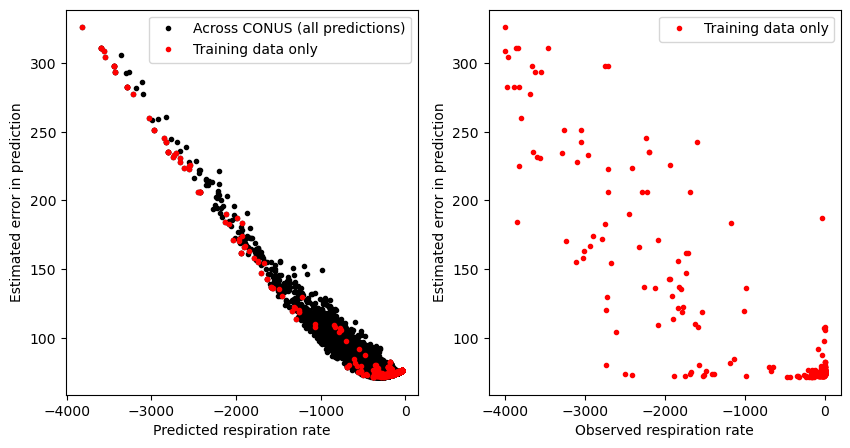

In [20]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

ax.plot(
    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    predict['mean.error_pre_avg'],
    'k.')

ax.plot(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    train_predict_merged['mean.error_pre_avg'],
    'r.')

ax.set_xlabel('Predicted respiration rate')
ax.set_ylabel('Estimated error in prediction')
ax.legend(["Across CONUS (all predictions)","Training data only"])

# No obs for predictions
#ax2.plot(
#    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
#    predict['mean.error_pre_avg'],
#    'k.')

ax2.plot(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['mean.error_pre_avg'],
    'r.')

ax2.set_xlabel('Observed respiration rate')
ax2.set_ylabel('Estimated error in prediction')
ax2.legend(["Training data only"])

my_r = np.corrcoef(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    train_predict_merged['mean.error_pre_avg'])
print('Pearson squared (left panel, training only): '+str(np.min(my_r*my_r)))

my_r = np.corrcoef(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['mean.error_pre_avg'])
print('Pearson squared (right panel, training only): '+str(np.min(my_r*my_r)))

Pearson squared (training only, left panel): 0.007503616848872857
Pearson squared (traininig only, right panel): 0.0033223439221287464


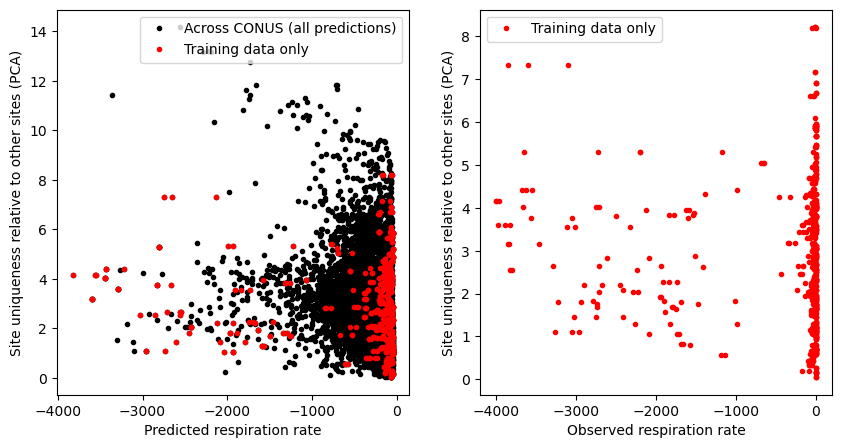

In [25]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

ax.plot(
    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    predict['pca.dist_pre_avg'],
    'k.')

ax.plot(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    train_predict_merged['pca.dist_pre_avg'],
    'r.')

ax.set_xlabel('Predicted respiration rate')
ax.set_ylabel('Site uniqueness relative to other sites (PCA)')
ax.legend(["Across CONUS (all predictions)","Training data only"])

# No obs for predictions
#ax2.plot(
#    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
#    predict['pca.dist_pre_avg'],
#    'k.')

ax2.plot(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    # Log10 "zoom" to verify no pattern within cold spots, too.
    #np.log10(np.abs(train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),
    train_predict_merged['pca.dist_pre_avg'],
    'r.')

ax2.set_xlabel('Observed respiration rate')
ax2.set_ylabel('Site uniqueness relative to other sites (PCA)')
ax2.legend(["Training data only"])

my_r = np.corrcoef(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'],
    train_predict_merged['pca.dist_pre_avg'])
print('Pearson squared (training only, left panel): '+str(np.min(my_r*my_r)))

my_r = np.corrcoef(
    train_predict_merged['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    train_predict_merged['pca.dist_pre_avg'])
print('Pearson squared (traininig only, right panel): '+str(np.min(my_r*my_r)))

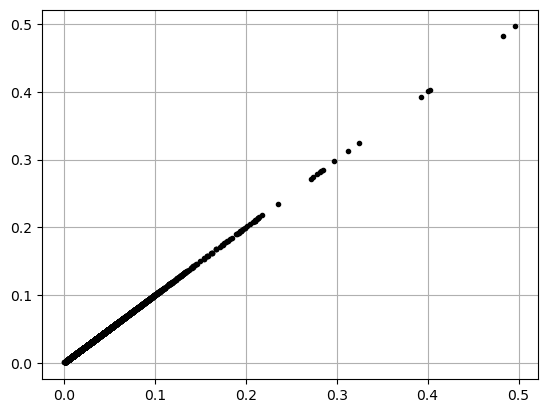

In [18]:
# Verify the computation of the combined.metric
fig, ax = plt.subplots()

ax.plot(
    predict['combined.metric_pre_avg'],
    np.multiply(
        (predict['pca.dist.scaled_pre_avg']), #/np.max(predict['pca.dist_pre_avg'])),
        (predict['mean.error.scaled_pre_avg']) #/np.max(predict['mean.error_pre_avg']))
    ),
    'k.'
)

ax.grid()

# It's not exact since the workflow drops some points due to missing data along the way
# so the exact values that are used to scale the pca.dist and mean.error are not exactly
# the same the maxima available here.